In [2]:
import random
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
plt.style.use('dark_background')

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

C:\Users\hp\AppData\Local\Temp\ipykernel_10620\3562262162.py:60: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  decay_count = np.sum(1 if (x>=i-1 and x < i) else 0 for x in decay_times)


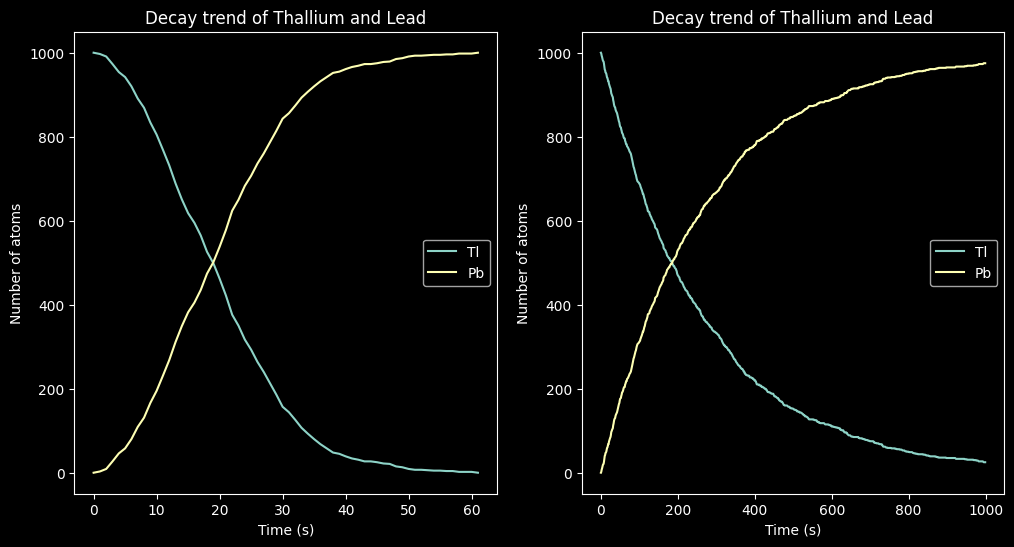

In [4]:
# Initial values of Thallium and Lead
tl, pb = 1000, 0

# Period in seconds 
τ = 3.052*60 

# decay probability at time t
p = lambda t : 1-2**(-t/τ)

# List to store the number of Tl and Pb atoms at each time step
evolution_history = [[tl,pb]]


for t in range(1,1000):
  
    # random numbers
    random_numbers = np.random.random(tl)
    
    # number of atoms that decay
    decay_count = sum(random_numbers < p(t))
    tl -= decay_count
    pb += decay_count
    evolution_history.append([tl,pb])
    if (tl == 0):
        break

# Ploting the evolution of the two sets as a function of time   
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.plot(evolution_history)
ax1.set_title('Decay trend of Thallium and Lead')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Number of atoms')
ax1.legend(['Tl','Pb'])


# Initial values of Thallium and Lead
tl, pb = 1000, 0

# Non-uniform probability distribution
p = lambda t : (2**(-t/τ))* np.log(2)/τ

# A CDF is defined as the integral of the probability density function (pdf) 
# from minus infinity to x. In this case, p is the pdf of the random variable t, 
# so the CDF F(t) is given
# by the integral of p(t) with respect to t from negative infinity to x:

F = lambda x : 1 - 1/2**(x/τ)

# Inverse cumulative distribution function of F(x)
inverse_cdf = lambda x : -τ * np.log2(1 - x)

# Generate random times of decay using the inverse transform method
decay_times  = inverse_cdf(np.random.random(size=(tl,)))
decay_times.sort()

# List to store the number of Tl and Pb atoms at each time step
evolution_history = [[tl,pb]]

for i in range(1,len(decay_times)):
    decay_count = np.sum(1 if (x>=i-1 and x < i) else 0 for x in decay_times)
    if(decay_count >= tl) or (tl == 0):
        evolution_history.append([0,1000])
        break
    else:
        tl -= decay_count
        pb += decay_count
        evolution_history.append([tl,pb])

# Ploting the evolution of the two sets as a function of time   
ax2.plot(evolution_history)
ax2.set_title('Decay trend of Thallium and Lead')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Number of atoms')
ax2.legend(['Tl','Pb'])

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

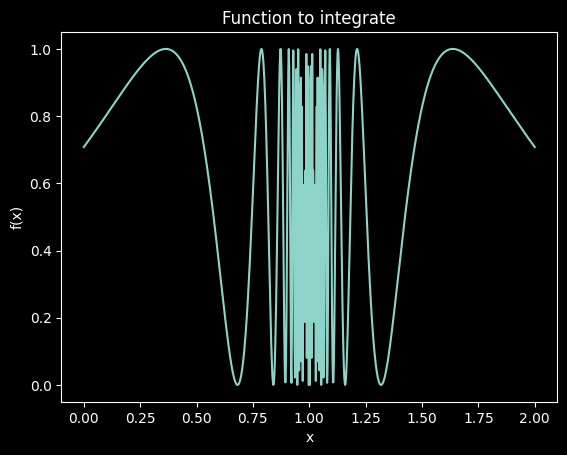

The expected integral value is: 1.3469.

The integral value with the hit and miss method is: 1.3470 +/- 0.0007.
The integral value with the mean value method is: 1.3471 +/- 0.0004.

The integrals are both obtained by repeating the integral 10 times and from the distribution of the integrals by taking the mean and standard deviation.
The integral value with the mean value method in one run with the associated error is: 1.3470 +/- 0.0007.

The two methods return slightly different values but compatible within the statistical error. The hit and miss method is a little less accurate, bu


In [6]:
def f(x):
    return (np.sin(1./(1-x)))**2

#plot of the function to integrate
x = np.linspace(0, 2, 1000)
plt.plot(x, f(x))
plt.title('Function to integrate')
plt.xlabel('x')
plt.ylabel('f(x)');
plt.show()

#number of random points to generate
N = 10**6
#integration domain
a = 0
b = 2

#function that performs the integral of a function with the hit and miss method
def integral_hm(f, a, b, N):
    count = 0  #counter
    for i in range(N):
        x = 2*np.random.random()  #x is random uniform between 0 and 2
        y = np.random.random()    #y is random uniform between 0 and 1
        if y<f(x): count += 1  
    I_hm = ((b-a)/N)*count  #integral value
    return I_hm
            
#function that performs the integral of a function with the mean value method
def integral_mv(f, a, b, N):
    f_list = []  #list of f(x)
    for i in range(N):
        x = 2*np.random.random()  #x is random uniform between 0 and 2
        y = np.random.random()    #y is random uniform between 0 and 1
        f_list.append(f(x))
    sum_f = np.sum(f_list)
    varf = np.var(f_list)
    I_mv = ((b-a)/N)*sum_f  #integral value
    sigma_mv = (b-a)*np.sqrt(varf/N)  #integral error
    return I_mv, sigma_mv

#repetition of the integral 10 times with hit and miss and mean value method
I_hm_repetition = []
I_mv_repetition = []
n = 10 #number of iterations of the integral calculation
for i in range(n):
    I_hm_repetition.append(integral_hm(f, 0., 2., N))
    I_mv, _ = integral_mv(f, 0., 2., N)
    I_mv_repetition.append(I_mv)
    
#calculation of the mean and the error of the mean
mean_I_hm = np.mean(I_hm_repetition)
sigma_hm = (b-a)*np.std(I_hm_repetition)/np.sqrt(n)
mean_I_mv = np.mean(I_mv_repetition)
sigma_mv = (b-a)*np.std(I_mv_repetition)/np.sqrt(n)

print('The expected integral value is: 1.3469.')

print('\nThe integral value with the hit and miss method is: %.4f +/- %.4f.' % (mean_I_hm, sigma_hm))
print('The integral value with the mean value method is: %.4f +/- %.4f.' % (mean_I_mv, sigma_mv))

print('\nThe integrals are both obtained by repeating the integral 10 times and from the distribution of the integrals by taking the mean and standard deviation.')

#calculation of the integral value and error with the mean value method in one run
I_mv, sigma_mv = integral_mv(f, 0., 2., N)

print('The integral value with the mean value method in one run with the associated error is: %.4f +/- %.4f.' % (I_mv, sigma_mv))

print('\nThe two methods return slightly different values but compatible within the statistical error. The hit and miss method is a little less accurate, bu')

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [7]:
def f(x):                  
    r2 = np.sum(x**2)  #calculate sum of squared coordinates
    if r2 <= 1: return 1
    else: return 0

#function that calculates the integral of the function f with the hit and miss method 
def integral_dsphere(f, a, b, d, N):
    x = np.random.uniform(a, b, size = (N,d))
    counter = 0
    for i in range(len(x)): counter += f(x[i])
    Id = (b-a)**d * counter / N
    return Id
    
#number of random points to generate in one dimension
N = 10**6

#integration domain
a = -1
b = 1

#dimention 2:
d = 2
I2 = integral_dsphere(f, a, b, d, N)

#dimention 10:
d = 10
I10 = integral_dsphere(f, a, b, d, N)

print('The area of a 2-dimentional sphere (circle) with radius 1 is:', I2, '(expected 3.1415)')
print('The hyper-volume of a 10-dimentional sphere with radius 1 is:', I10, '(expected 2.550)')

The area of a 2-dimentional sphere (circle) with radius 1 is: 3.141724 (expected 3.1415)
The hyper-volume of a 10-dimentional sphere with radius 1 is: 2.562048 (expected 2.550)


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [8]:
def f(x):
    return x**(-1/2)/(np.exp(x)+1)

#define the weight function
def w(x):
    return 1/np.sqrt(x)

#inverse transform method for sampling
def inv_transform(y):
    return y**2/4

#inverse transform method for sampling
N = 10**6
y = np.random.uniform(0, 2, size=N) #y is uniform distributed variable between 0 and 2
x = inv_transform(y)

#integration with importance sampling
I = 1/N * np.sum(f(x)/w(x)) * 2.   #2 = value of integral w(z) in (0,1)

print('The integral value: {:.4f}'.format(I))
print('The expect integral value: 0.84')

The integral value: 0.8391
The expect integral value: 0.84
